# ML Training Pipeline for Baseline model using Imazon's water data

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from WaterDataset import WaterDataset
from Baseline import Baseline
from utils import *
import metrics
import matplotlib.pyplot as plt
%matplotlib inline

/home/ophirsim/miniconda3/envs/ClimaXtreme/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the Train, Val, and Test Datasets and Dataloaders

In [2]:
timestep = 6
history = 5
iterative = True
device = 'cuda' if torch.cuda.is_available() else 'cpu'

train_set = WaterDataset('/localhome/ophirsim/Imazon_Water_Dataset/train', timestep=timestep, history=history, iterative=iterative, device=device)
val_set = WaterDataset('/localhome/ophirsim/Imazon_Water_Dataset/val', timestep=timestep, history=history, iterative=iterative, device=device)
test_set = WaterDataset('/localhome/ophirsim/Imazon_Water_Dataset/test', timestep=timestep, history=history, iterative=iterative, device=device)

batch_size = 1
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

## Visualize Differences in Samples and Labels, separated by *timestep* months apart

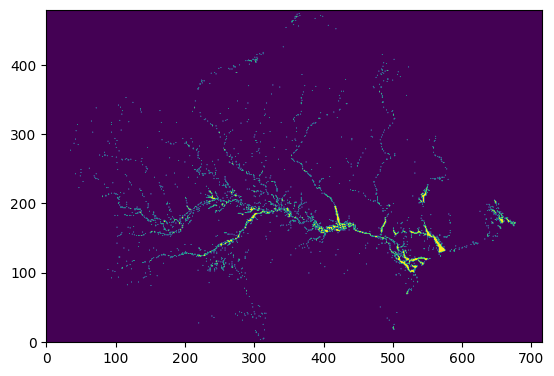

In [3]:
plt.imshow(train_set[0][0][0, :, :].cpu(), origin='lower')

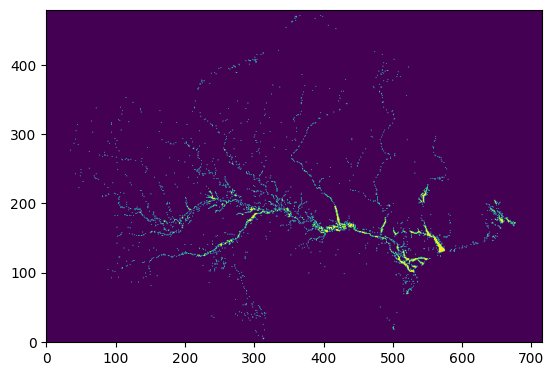

In [4]:
plt.imshow(train_set[0][1][:, :].cpu(), origin='lower')

## Load the Model

In [5]:
img_size = (480, 716)
emb_size = 480*716*history
model = Baseline(img_size, emb_size, history=history, device=device,
                patch_size=4,
                embed_dim=128,
                depth=3,
                decoder_depth=1,
                num_heads=2,
                dtype=torch.float)

acc_metrics = {'accuracy': metrics.accuracy, 'f1': metrics.f1, 'TP':metrics.TP, 'FP':metrics.FP, 'TN':metrics.TN, 'FN':metrics.FN}


## Train the Model

	 lr: 0.0001
	 weight_decay: 1e-05
Epoch: 0
loss: 0.695581  [    1/ 2043]
loss: 0.071974  [  201/ 2043]
loss: 0.067765  [  401/ 2043]
loss: 0.061966  [  601/ 2043]
loss: 0.043255  [  801/ 2043]
loss: 0.047494  [ 1001/ 2043]
loss: 0.044413  [ 1201/ 2043]
loss: 0.045119  [ 1401/ 2043]
loss: 0.045549  [ 1601/ 2043]
loss: 0.043971  [ 1801/ 2043]
loss: 0.040969  [ 2001/ 2043]
Epoch 0 Train loss: 0.04087337994117452
Epoch 0 Val loss: 0.04160323519826917
Epoch 0 Val accuracy: 0.9881263924724281
Epoch 0 Val f1: 0.3598210869595496
Epoch 0 Val TP: 1118.7201646090534
Epoch 0 Val FP: 1118.8106995884773
Epoch 0 Val TN: 338480.5596707819
Epoch 0 Val FN: 2961.909465020576
Epoch: 1
loss: 0.044778  [    1/ 2043]
loss: 0.038036  [  201/ 2043]
loss: 0.035555  [  401/ 2043]
loss: 0.037798  [  601/ 2043]
loss: 0.036746  [  801/ 2043]
loss: 0.037324  [ 1001/ 2043]
loss: 0.037856  [ 1201/ 2043]
loss: 0.035359  [ 1401/ 2043]
loss: 0.034863  [ 1601/ 2043]
loss: 0.034508  [ 1801/ 2043]
loss: 0.031636  [ 2001/ 2

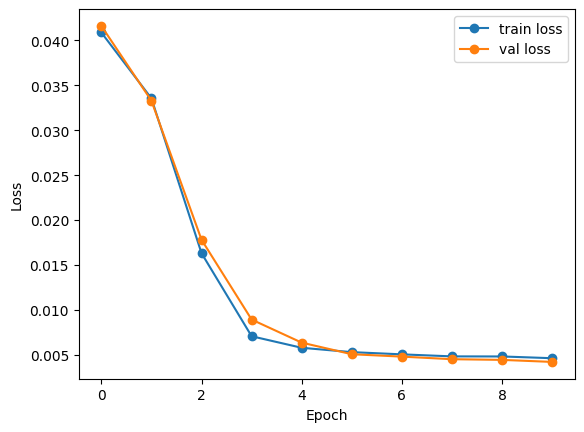

	 lr: 0.0001
	 weight_decay: 1e-05
Epoch: 0
loss: 0.693976  [    1/ 2043]
loss: 0.068342  [  201/ 2043]
loss: 0.060710  [  401/ 2043]
loss: 0.062306  [  601/ 2043]
loss: 0.049548  [  801/ 2043]
loss: 0.050556  [ 1001/ 2043]
loss: 0.052770  [ 1201/ 2043]
loss: 0.041492  [ 1401/ 2043]
loss: 0.039623  [ 1601/ 2043]
loss: 0.044340  [ 1801/ 2043]
loss: 0.039855  [ 2001/ 2043]
Epoch 0 Train loss: 0.03940095389612854
Epoch 0 Val loss: 0.03900647203250186
Epoch 0 Val accuracy: 0.9890335776187755
Epoch 0 Val f1: 0.3350255176341329
Epoch 0 Val TP: 980.0082304526749
Epoch 0 Val FP: 668.3168724279835
Epoch 0 Val TN: 338931.0534979424
Epoch 0 Val FN: 3100.6213991769546
Epoch: 1
loss: 0.037619  [    1/ 2043]
loss: 0.043672  [  201/ 2043]
loss: 0.035611  [  401/ 2043]
loss: 0.036267  [  601/ 2043]
loss: 0.033108  [  801/ 2043]
loss: 0.031379  [ 1001/ 2043]
loss: 0.041441  [ 1201/ 2043]
loss: 0.032455  [ 1401/ 2043]
loss: 0.031784  [ 1601/ 2043]
loss: 0.033033  [ 1801/ 2043]
loss: 0.032612  [ 2001/ 20

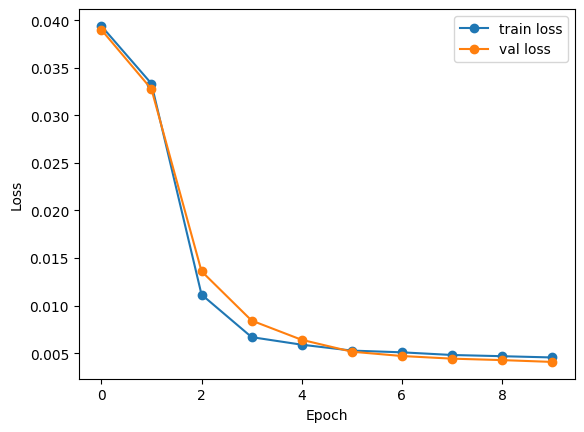

In [6]:
for lr in [1e-4]:
    for weight_decay in [1e-5]:
        for weight in [0.5, None]:
            if weight is None:
                loss_fn = nn.CrossEntropyLoss()
            else:
                loss_fn = nn.CrossEntropyLoss(torch.tensor([weight, 1-weight], dtype=torch.float, device=device))

            print(f'\t lr: {lr}')
            print(f'\t weight_decay: {weight_decay}')

            model = Baseline(img_size, emb_size, history=history, device=device,
                    patch_size=4,
                    embed_dim=128,
                    depth=3,
                    decoder_depth=1,
                    num_heads=2,
                    dtype=torch.float)

            epochs = 10
            optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
            train_losses, val_losses = train(train_loader, val_loader, model, loss_fn, optimizer, acc_metrics, epochs)

            plt.figure()
            plt.plot([x for x in range(len(train_losses))], train_losses, marker='o', linestyle="-", label='train loss')
            plt.plot([x for x in range(len(val_losses))], val_losses, marker='o', linestyle="-", label='val loss')
            plt.legend(loc="upper right")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()

In [9]:
# load model and optimizer state from state dict
state_dict = torch.load('model_9.ckpt')
model.load_state_dict(state_dict['model_state_dict'])
# optimizer.load_state_dict(state_dict['optimizer_state_dict'])
train_losses = state_dict['train_loss_history']
val_losses = state_dict['val_loss_history']

## Test the Model

In [10]:
# TODO: establish accuracy metric
test_accs, test_loss = test(test_loader, model, loss_fn, acc_metrics)
print(f"test_acc: {test_accs['accuracy']}")
print(f"test_f1: {test_accs['f1']}")
print(f"TP: {test_accs['TP']}")
print(f"TN: {test_accs['TN']}")
print(f"FP: {test_accs['FP']}")
print(f"FN: {test_accs['FN']}")
print(f"test_loss: {test_loss}")

test_acc: 0.998537579436361
test_f1: 0.9379805949563117
TP: 3836.522633744856
TN: 339340.87242798356
FP: 252.96296296296296
FN: 249.64197530864197
test_loss: 0.004655807233059112
